# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.
 
__Задание__. Необходимо выполнить любое из двух заданий

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров).Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.
 
Good luck & have fun! :)

### Подключение библиотек

In [6]:
import numpy as np
import torch
import torchvision
import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
from torchvision.datasets import ImageFolder

# You may add any imports you need
from torchvision import datasets, transforms
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import helper

from torch import nn, optim
from tqdm.auto import tqdm

from torchvision.transforms import Compose, Normalize, ToTensor 
from torchvision.models import resnet18
from google.colab import files

import random
import glob
import sys
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

### Подготовка данных

Скачаем датасет.

In [7]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip

--2021-11-21 20:07:02--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/33l8lp62rmvtx40/dataset.zip [following]
--2021-11-21 20:07:02--  https://www.dropbox.com/s/raw/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce3ee82914dd3900d41e7537ffa.dl.dropboxusercontent.com/cd/0/inline/BaaZ5fQ6xL6Omk9zgPRT3twE69v9If4fpR4ugmfUGH967A0ccEAj1XOec-6VJM4wbaHme1a1dsQZ-lJVdx2nqI5U6SN2aV-NctjjlkME1G1G8IFhkAtjOAGAFDjbwwCCRq9xIx-h3ZhWdktEzqfdwhRZ/file# [following]
--2021-11-21 20:07:02--  https://uce3ee82914dd3900d41e7537ffa.dl.dropboxusercontent.com/cd/0/inline/BaaZ5fQ6xL6Omk9zgPRT3twE69v9If4fpR4ugmfUGH967A0ccEAj1XOec-6VJM4wbaHme1a1dsQZ-lJVdx2nqI5U6SN2

Разархивируем.

In [8]:
!unzip dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: dataset/dataset/val/class_101/00048.jpg  
  inflating: dataset/dataset/val/class_101/00049.jpg  
   creating: dataset/dataset/val/class_102/
  inflating: dataset/dataset/val/class_102/00000.jpg  
  inflating: dataset/dataset/val/class_102/00001.jpg  
  inflating: dataset/dataset/val/class_102/00002.jpg  
  inflating: dataset/dataset/val/class_102/00003.jpg  
  inflating: dataset/dataset/val/class_102/00004.jpg  
  inflating: dataset/dataset/val/class_102/00005.jpg  
  inflating: dataset/dataset/val/class_102/00006.jpg  
  inflating: dataset/dataset/val/class_102/00007.jpg  
  inflating: dataset/dataset/val/class_102/00008.jpg  
  inflating: dataset/dataset/val/class_102/00009.jpg  
  inflating: dataset/dataset/val/class_102/00010.jpg  
  inflating: dataset/dataset/val/class_102/00011.jpg  
  inflating: dataset/dataset/val/class_102/00012.jpg  
  inflating: dataset/dataset/val/class_102/00013.jpg  
  inflat

In [9]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Создадим класс датасета, датасеты и даталоадеры. Посмотрим на картинки с помощью функции imshow(). Пока оставим такой transform, но позже изменим аугментации и заменим датасеты на новые.

In [10]:
# создадим класс датасета
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        set_random_seed(1)
        self.data_dir = data_dir
        self.transform = transform
        self.dataset = ImageFolder(
                          self.data_dir, 
                          transform=self.transform
                          )
        self.length = len(self.dataset)
       # self.length_for_train = int(len(self.dataset)/10)
    
    def __getitem__(self, idx):
        return self.dataset[idx]

    
    def __len__(self):
        return self.length

Один из источников по аугментациям. Далее будет приведен еще один.
https://www.analyticsvidhya.com/blog/2021/04/10-pytorch-transformations-you-need-to-know

In [11]:
import PIL
set_random_seed(1)
train_transform = transforms.Compose( 
    [
        transforms.ToTensor(),
        transforms.RandomRotation(degrees=10, resample=PIL.Image.BILINEAR),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
train_dataset = MyDataset("dataset/dataset/train", transform=train_transform)

val_dataset = MyDataset("dataset/dataset/val", transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False) 

Для написания функции imshow пользовалась этим сайтом: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

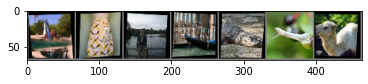

tensor([169, 173,  44, 102,  64,  96,  17])


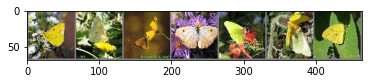

tensor([0, 0, 0, 0, 0, 0, 0])


In [21]:
def imshow(img): 
    set_random_seed(1)
    img = img / 2+0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

set_random_seed(1)
dataiter = iter(train_dataloader) # get some random training images
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:7]))
print(labels[:7])

dataiter = iter(val_dataloader) # get some random training images
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:7]))
print(labels[:7])

In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

Функции взяты из пятого семинара с малым изменением.

In [13]:
def train_one_epoch(model, data_loader, criterion, optimizer, device, return_losses=False, scheduler = None): #Взято из 5 семинара
  model = model.to(device).train()
  total_loss = 0
  num_batches = 0
  all_losses = []
  total_predictions = np.array([])
  total_labels = np.array([])
  with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
      for images, labels in data_loader:
          # Move Batch to GPU
          images = images.to(device)
          labels = labels.to(device)
          predicted = model(images)
          loss = criterion(predicted, labels)
          # Update weights
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
          # Update descirption for tqdm
          accuracy = (predicted.argmax(1) == labels).float().mean()
          prbar.set_description(
              f"Loss: {round(loss.item(), 4)} "
              f"Accuracy: {round(accuracy.item() * 100, 4)}"
          )
          prbar.update(1)
          total_loss += loss.item()
          total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
          total_labels = np.append(total_labels, labels.cpu().detach().numpy())
          num_batches += 1
          all_losses.append(loss.detach().item())
  metrics = {"loss": total_loss / num_batches}
  metrics.update({"Current epoch accuracy": (total_predictions == total_labels).mean()})
  scheduler.step()
  print("Current epoch accuracy", (total_predictions == total_labels).mean())
  if return_losses:
      return metrics, all_losses
  else:
      return metrics

In [2]:
def predict(model, data_loader, criterion, device): #Взято из 5 семинара
    model = model.eval()
    loss_summary = []
    total_loss = 0
    num_batches = 0
    total_predictions = np.array([])
    total_labels = np.array([])
    with tqdm(total=len(data_loader), file=sys.stdout) as prbar:
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)
            predicted = model(images)
            loss = criterion(predicted, labels)
            accuracy = (predicted.argmax(1) == labels).float().mean()
            prbar.set_description(
                f"Loss: {round(loss.item(), 4)} "
                f"Accuracy: {round(accuracy.item() * 100, 4)}"
            )
            prbar.update(1)
            total_loss += loss.item()
            loss_summary.append(loss.item())
            total_predictions = np.append(total_predictions, predicted.argmax(1).cpu().detach().numpy())
            total_labels = np.append(total_labels, labels.cpu().detach().numpy())
            num_batches += 1
    metrics = {"loss": total_loss / num_batches}
    metrics.update({"accuracy": (total_predictions == total_labels).mean()})
    print("Validation accuracy: ", metrics)
    return loss_summary, total_predictions, total_labels#

In [4]:
def train(model, epochs, train_data_loader, validation_data_loader, optimizer, criterion, device, scheduler=None): 
    set_random_seed(1)
    all_train_losses = []
    epoch_train_losses = []
    epoch_eval_losses = []
    for epoch in range(epochs):
        # Train step
        print("_____________")
        print(f"Train Epoch: {epoch+1}")
        train_metrics, one_epoch_train_losses = train_one_epoch(
            model=model,
            data_loader=train_data_loader,
            optimizer=optimizer,
            return_losses=True,
            criterion=criterion,
            device=device,
            scheduler=scheduler
        )
        # Save Train losses
        all_train_losses.extend(one_epoch_train_losses)
        epoch_train_losses.append(train_metrics["loss"])
        # Eval step
        print(f"Validation Epoch: {epoch+1}")
        with torch.no_grad():
            validation_metrics, total_predictions, total_labels = predict(
                model=model,
                data_loader=validation_data_loader,
                criterion=criterion,
                device=device
            )
        val_metrics = (total_predictions == total_labels).mean()
        # Save eval losses
        epoch_eval_losses = validation_metrics
    return val_metrics, epoch_eval_losses

In [15]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

### Внимание! Итоговая модель:

In [17]:
set_random_seed(1)
train_transform = transforms.Compose( 
    [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.9),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),        
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
train_dataset = MyDataset("dataset/dataset/train", transform=train_transform)

val_dataset = MyDataset("dataset/dataset/val", transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True) 
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False) 

model = resnet18(pretrained=False)
model.fc = nn.Linear(512, 200)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,  weight_decay=0.0003)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 12], gamma=0.2)

final_val_metrics, valid_losses = train(model, 13, train_dataloader, val_dataloader, optimizer, criterion, device=device, scheduler=scheduler)


_____________
Train Epoch: 1


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.09114
Validation Epoch: 1


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.9522271275520326, 'accuracy': 0.1356}
_____________
Train Epoch: 2


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.18811
Validation Epoch: 2


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.5560567140579225, 'accuracy': 0.2052}
_____________
Train Epoch: 3


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.23884
Validation Epoch: 3


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.3673138558864593, 'accuracy': 0.2337}
_____________
Train Epoch: 4


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.28017
Validation Epoch: 4


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.2404545307159425, 'accuracy': 0.2552}
_____________
Train Epoch: 5


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.31161
Validation Epoch: 5


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.143350273370743, 'accuracy': 0.2807}
_____________
Train Epoch: 6


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.34006
Validation Epoch: 6


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 3.063637465238571, 'accuracy': 0.2865}
_____________
Train Epoch: 7


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.36402
Validation Epoch: 7


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.862692657113075, 'accuracy': 0.3289}
_____________
Train Epoch: 8


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.39215
Validation Epoch: 8


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.875015076994896, 'accuracy': 0.3239}
_____________
Train Epoch: 9


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.41302
Validation Epoch: 9


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.832484430074692, 'accuracy': 0.343}
_____________
Train Epoch: 10


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.43181
Validation Epoch: 10


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.7094145208597182, 'accuracy': 0.3623}
_____________
Train Epoch: 11


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.53301
Validation Epoch: 11


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.375563183426857, 'accuracy': 0.4286}
_____________
Train Epoch: 12


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.5715
Validation Epoch: 12


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.3734479784965514, 'accuracy': 0.43}
_____________
Train Epoch: 13


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.62076
Validation Epoch: 13


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.334347066283226, 'accuracy': 0.4402}


In [18]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels, predicted_labels)
print("Оценка за это задание составит {} баллов".format(min(10, 10 * accuracy / 0.44)))

  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.334347066283226, 'accuracy': 0.4402}
Оценка за это задание составит 10 баллов


In [19]:
#К сожалению, random_seed в окошках выше был зафиксирован криво, а число эпох "на грани"
#Так что возможно, обучение чут-чуть не дотянет до 0.44 при перезапуске у проверяющего.
#В таком случае, просьба запустить дополнительно строку ниже. Вдруг получится выбить 0.44 :)
final_val_metrics, valid_losses = train(model, 3, train_dataloader, val_dataloader, optimizer, criterion, device=device, scheduler=scheduler)


_____________
Train Epoch: 1


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.63531
Validation Epoch: 1


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.3306686162948607, 'accuracy': 0.4436}
_____________
Train Epoch: 2


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.64471
Validation Epoch: 2


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.345407176017761, 'accuracy': 0.4426}
_____________
Train Epoch: 3


  0%|          | 0/391 [00:00<?, ?it/s]

Current epoch accuracy 0.65536
Validation Epoch: 3


  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 2.35394791662693, 'accuracy': 0.441}


### Отчет об экспериментах

Сначала я попыталась реализовать модель с третьего семинара, но с качеством было всё плохо и я вскоре переключилась на более легкий путь - использовать готовую модель resnet18. Из аугментаций я прописывала многое: вращение, изменение яркости, отражение, но всё приводило к качеству <= 0.40. Меняла шаги,размеры батча, gamma, milestones, ввела weight_decay в надежде повлиять на переобучение. Ничего не помогало и зачастую изменения в прогнозах не были очевидны. Размер батча - чем больше он, тем быстрее обучение, потому отказалась от размера в 64 в пользу 256. Шаг также сделала больше, чтобы модель сходилась быстрее, за меньшее число эпох. 

Потом я решила, что вращение как аугментация, возможно, плохая идея (например, человеку не легче от того, что он увидит неизвестный объект перевернутым). Я убрала transforms.RandomRotation, оставила лишь transforms.RandomHorizontalFlip и transforms.RandomPerspective, они показались мне наиболее нужными по статьям, иллюстрирующим их применение (выглядит как зеркало и перспектива) (https://pystyle.info/pytorch-list-of-transforms/#outline__6_1 и 
https://www.analyticsvidhya.com/blog/2021/0410-pytorch-transformations-you-need-to-know/). С изменением яркости также решила повременить. Таким образом, качество в 0.44 было достигнуто.

### Замечание
Одна проверка была упущена выше. Для итоговой модели, но не обученной, она приведена здесь:

In [16]:
set_random_seed(1)
train_transform = transforms.Compose( 
    [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomPerspective(distortion_scale=0.2, p=0.9),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
val_transform = transforms.Compose(
    [
        transforms.ToTensor(),        
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
train_dataset = MyDataset("dataset/dataset/train", transform=train_transform)

val_dataset = MyDataset("dataset/dataset/val", transform=val_transform)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True) 
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=256, shuffle=False) 

model = resnet18(pretrained=False)
model.fc = nn.Linear(512, 200)
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001,  weight_decay=0.0003)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[10, 12], gamma=0.2)

all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels, true_labels)
print("tests passed")

  0%|          | 0/40 [00:00<?, ?it/s]

Validation accuracy:  {'loss': 5.335430932044983, 'accuracy': 0.0049}
tests passed


____________________________